/home/diego/.local/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2025-04-28 11:14:35,269 - INFO - Total de sujetos en CSV: 432
2025-04-28 11:14:35,270 - INFO - Total de rutas generadas en X: 432
2025-04-28 11:14:35,270 - INFO - Distribución de y: (array(['AD_F', 'AD_M', 'CN_F', 'CN_M', 'Other_F', 'Other_M'], dtype='<U7'), array([ 39,  55,  52,  37, 115, 134]))
2025-04-28 11:14:35,272 - INFO - 
===== FOLD 1 =====
/tmp/ipykernel_694863/3891044452.py:134: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a 

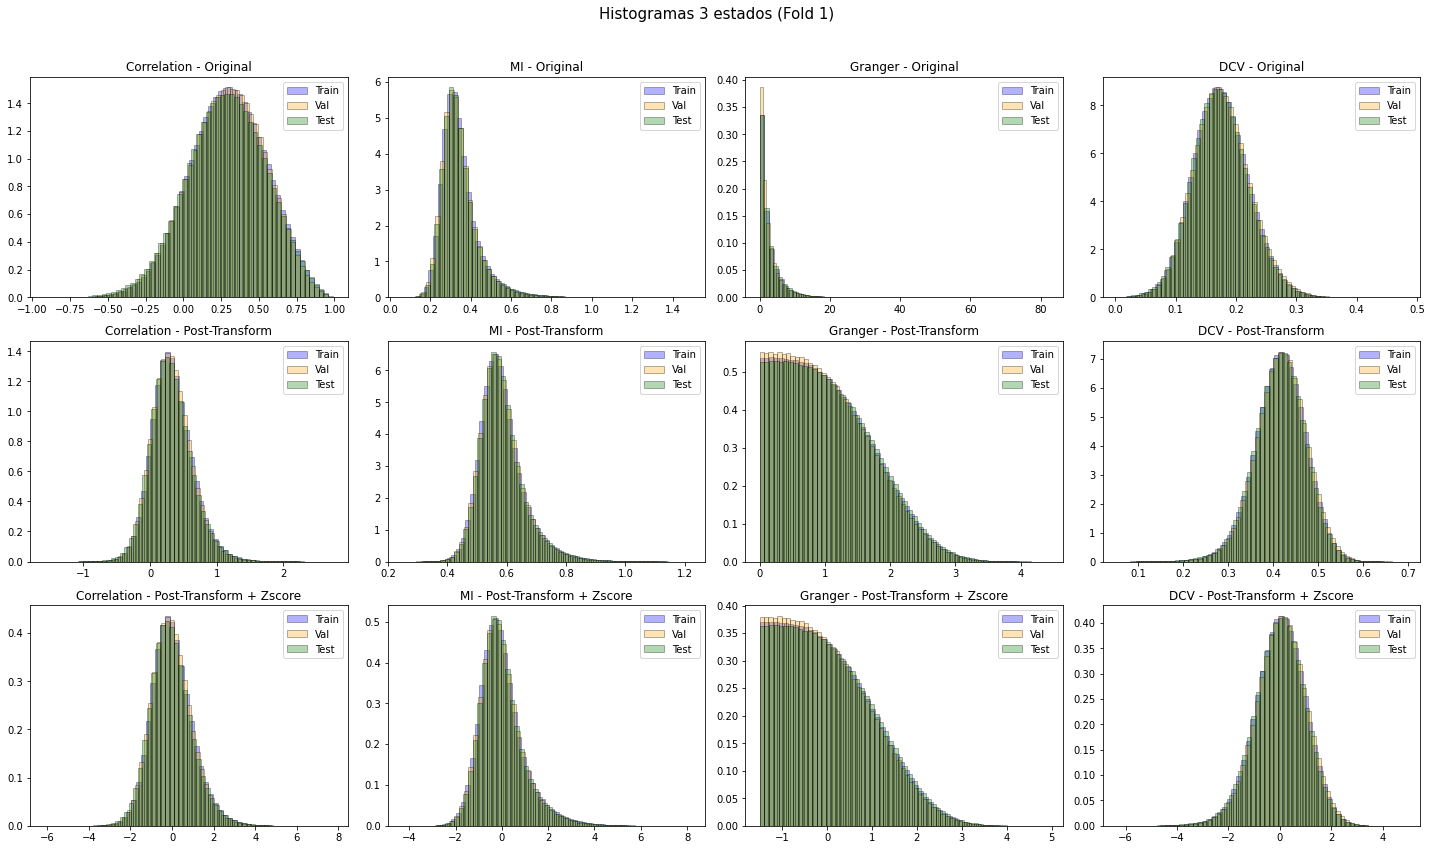

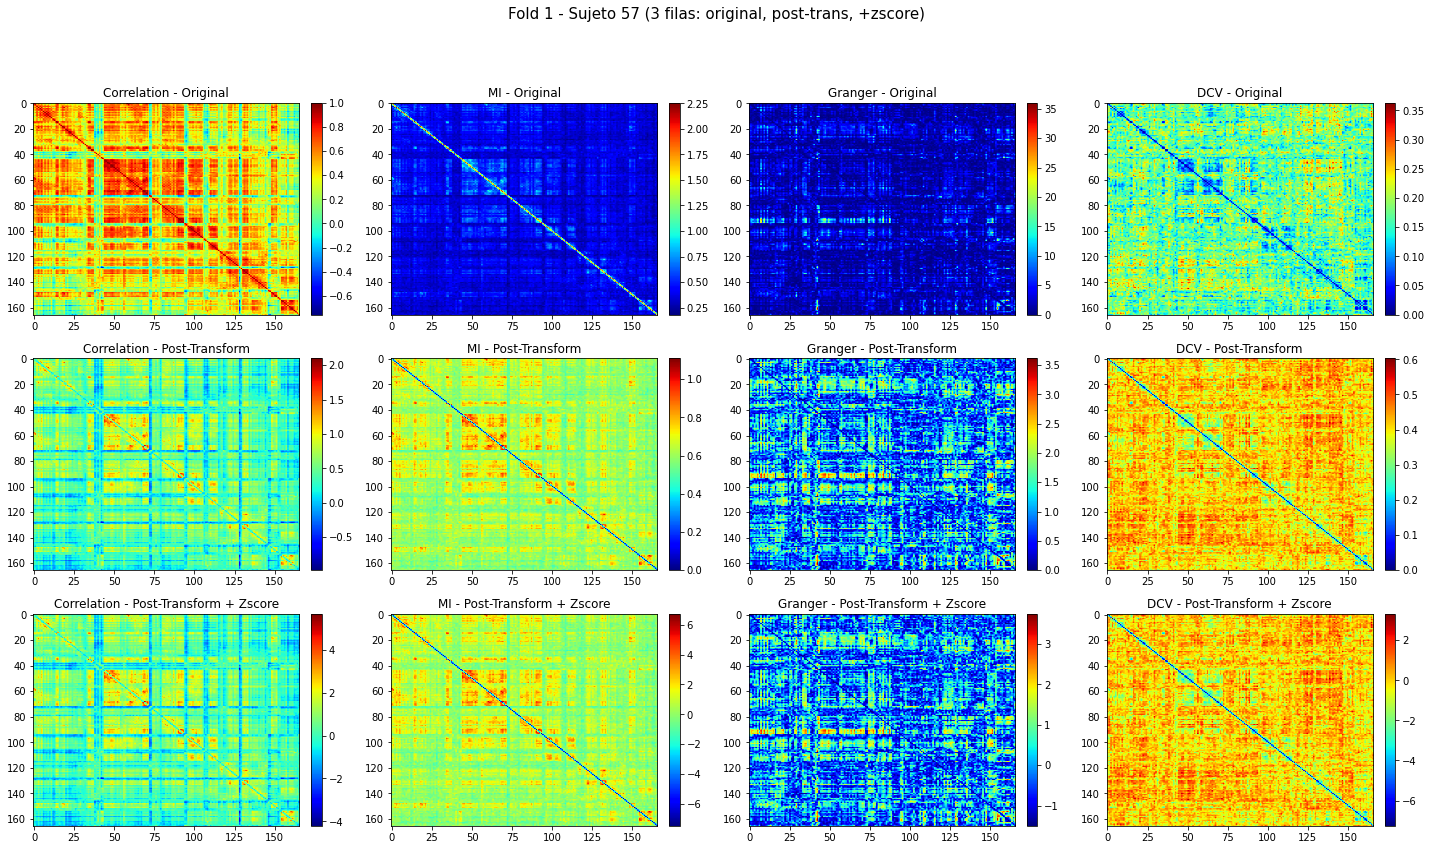

2025-04-28 11:14:44,320 - INFO - [Fold 1] => Datos y estadísticas guardados en /home/diego/Escritorio/GrandMeanNorm/fold_1
2025-04-28 11:14:44,321 - INFO - 
===== FOLD 2 =====
/tmp/ipykernel_694863/3891044452.py:134: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded fi

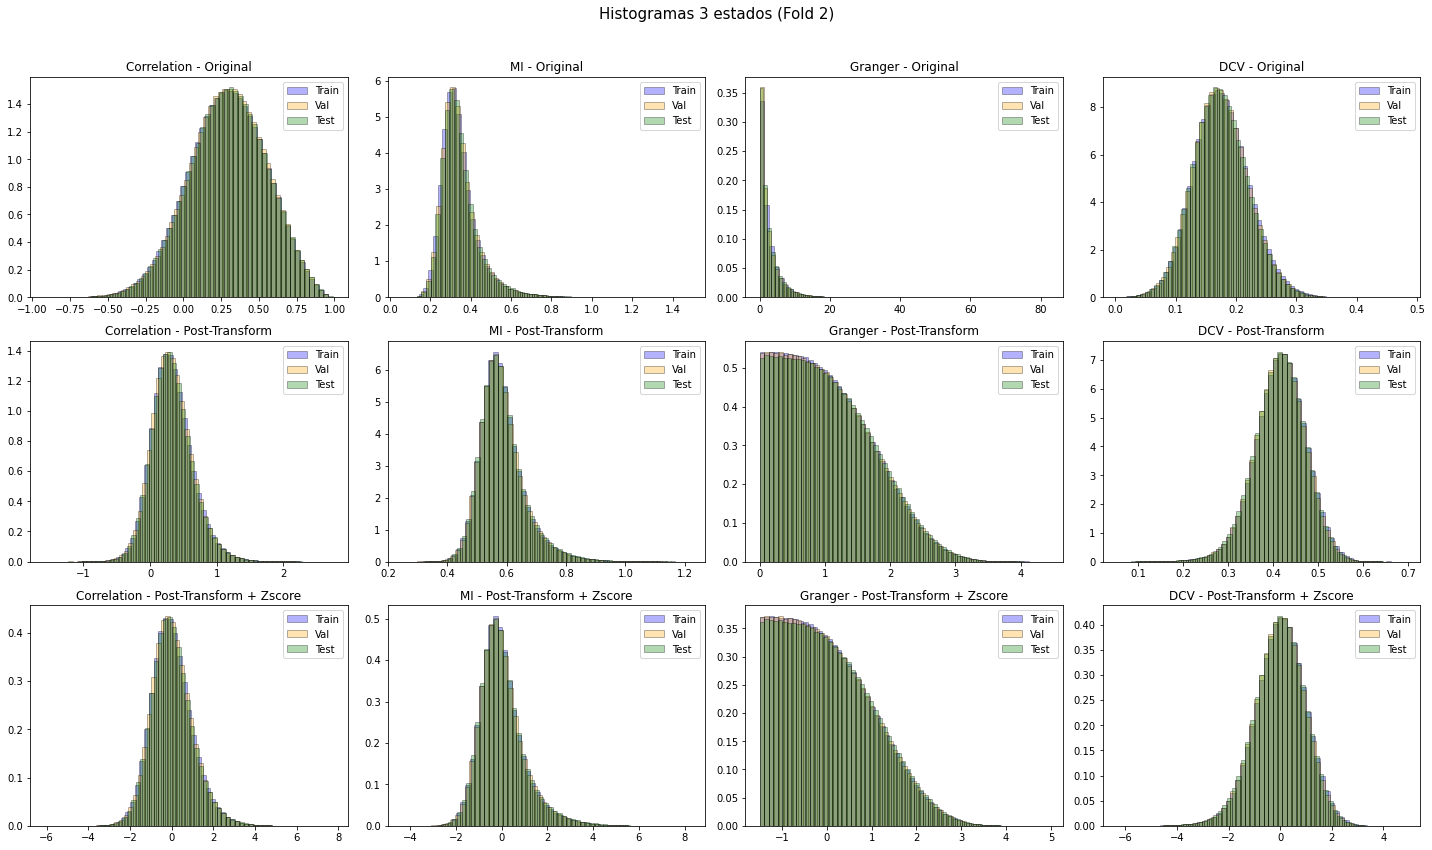

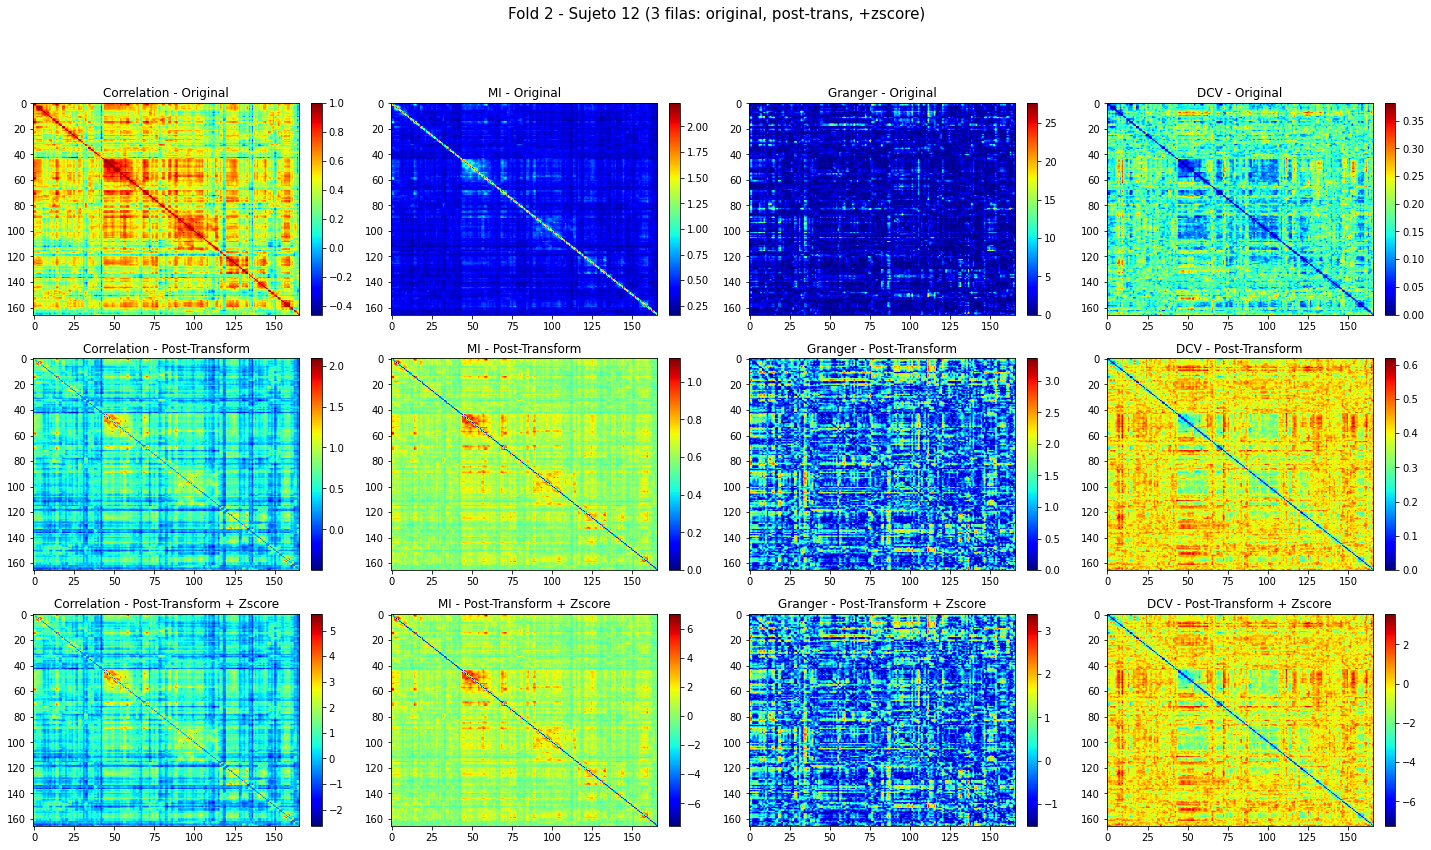

2025-04-28 11:14:53,251 - INFO - [Fold 2] => Datos y estadísticas guardados en /home/diego/Escritorio/GrandMeanNorm/fold_2
2025-04-28 11:14:53,252 - INFO - 
===== FOLD 3 =====
/tmp/ipykernel_694863/3891044452.py:134: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded fi

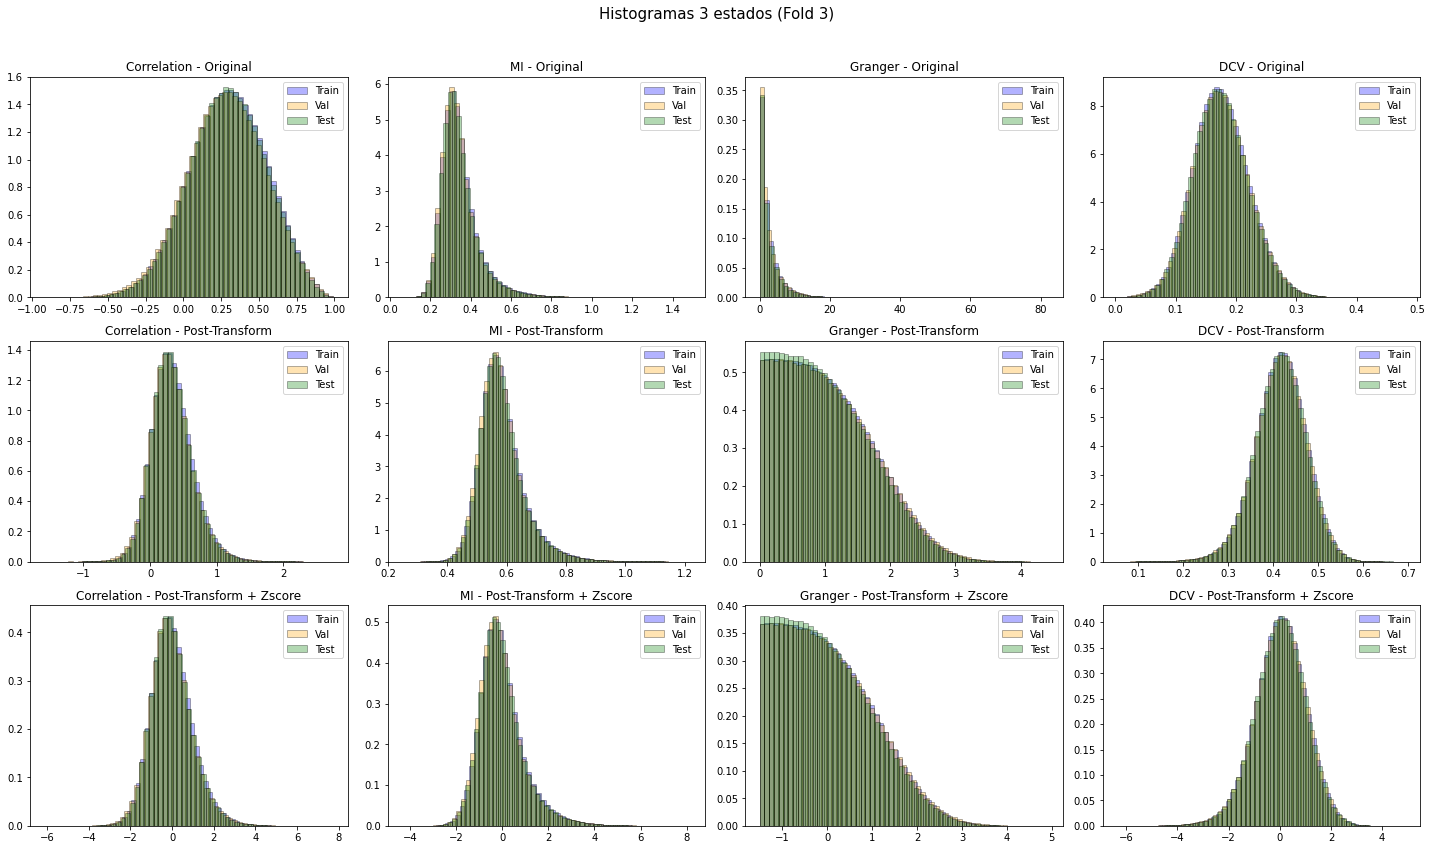

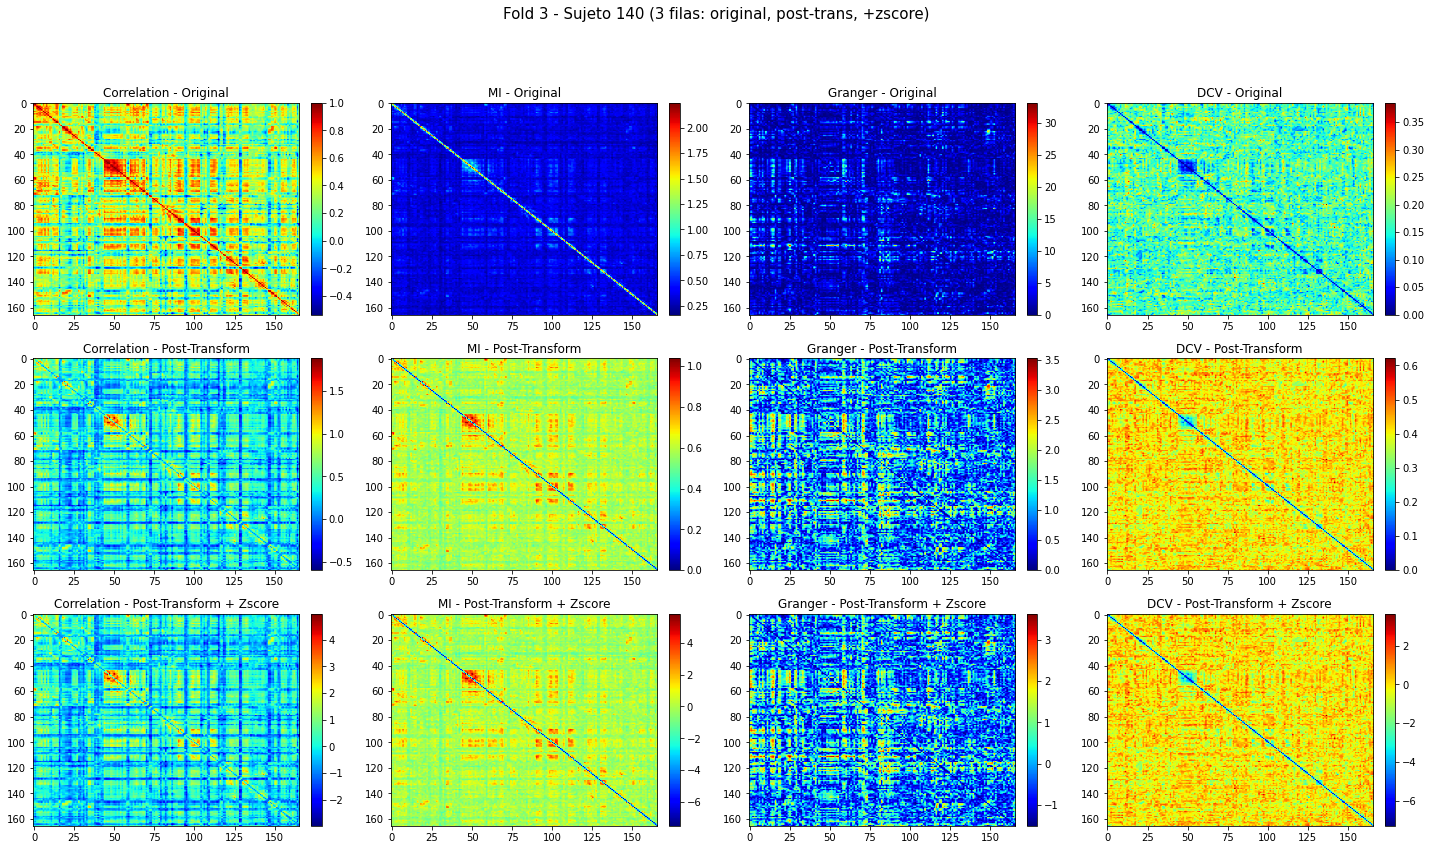

2025-04-28 11:15:16,918 - INFO - [Fold 3] => Datos y estadísticas guardados en /home/diego/Escritorio/GrandMeanNorm/fold_3
2025-04-28 11:15:16,919 - INFO - 
===== FOLD 4 =====
/tmp/ipykernel_694863/3891044452.py:134: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded fi

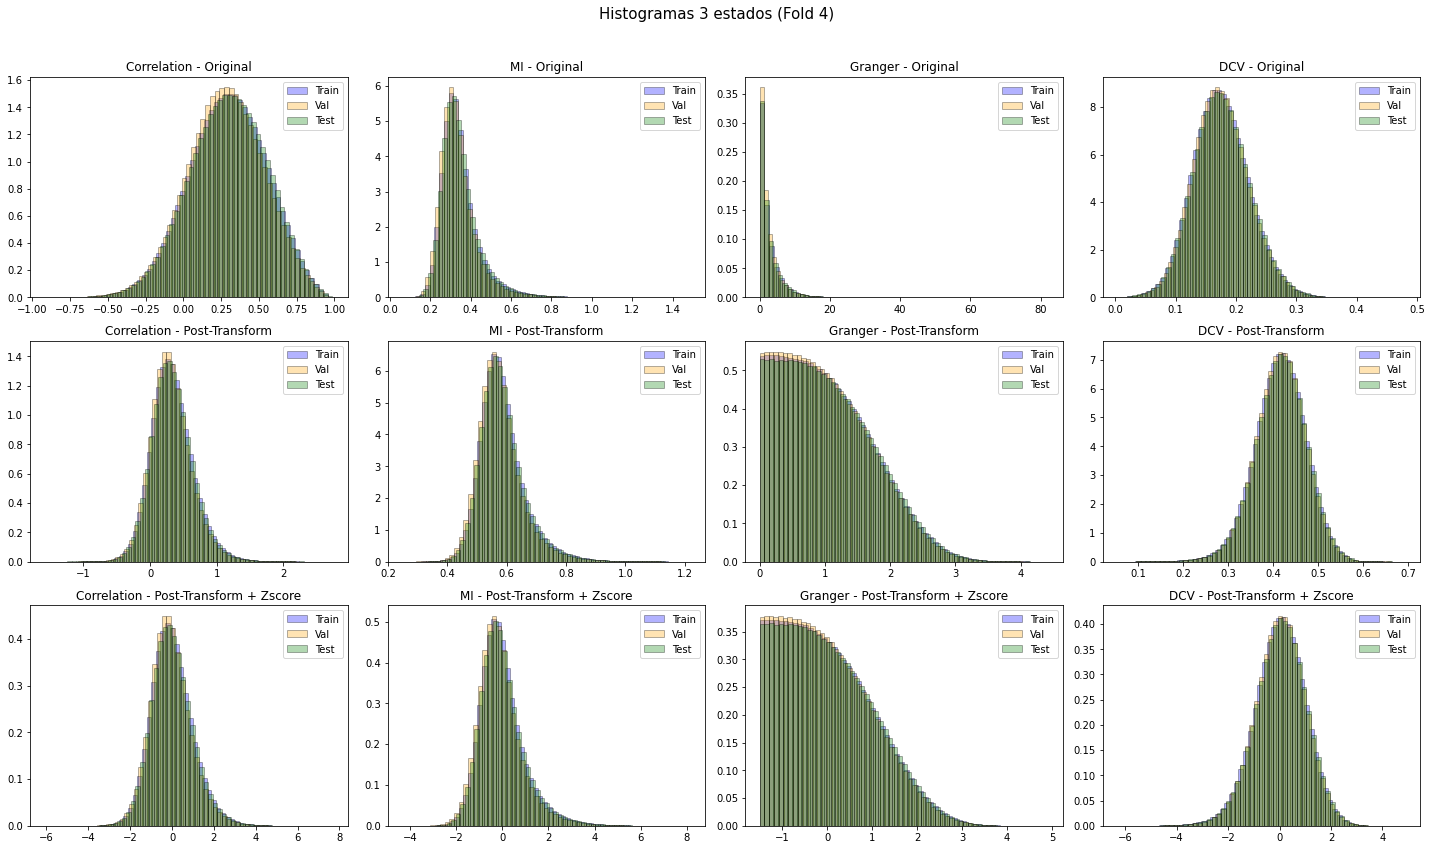

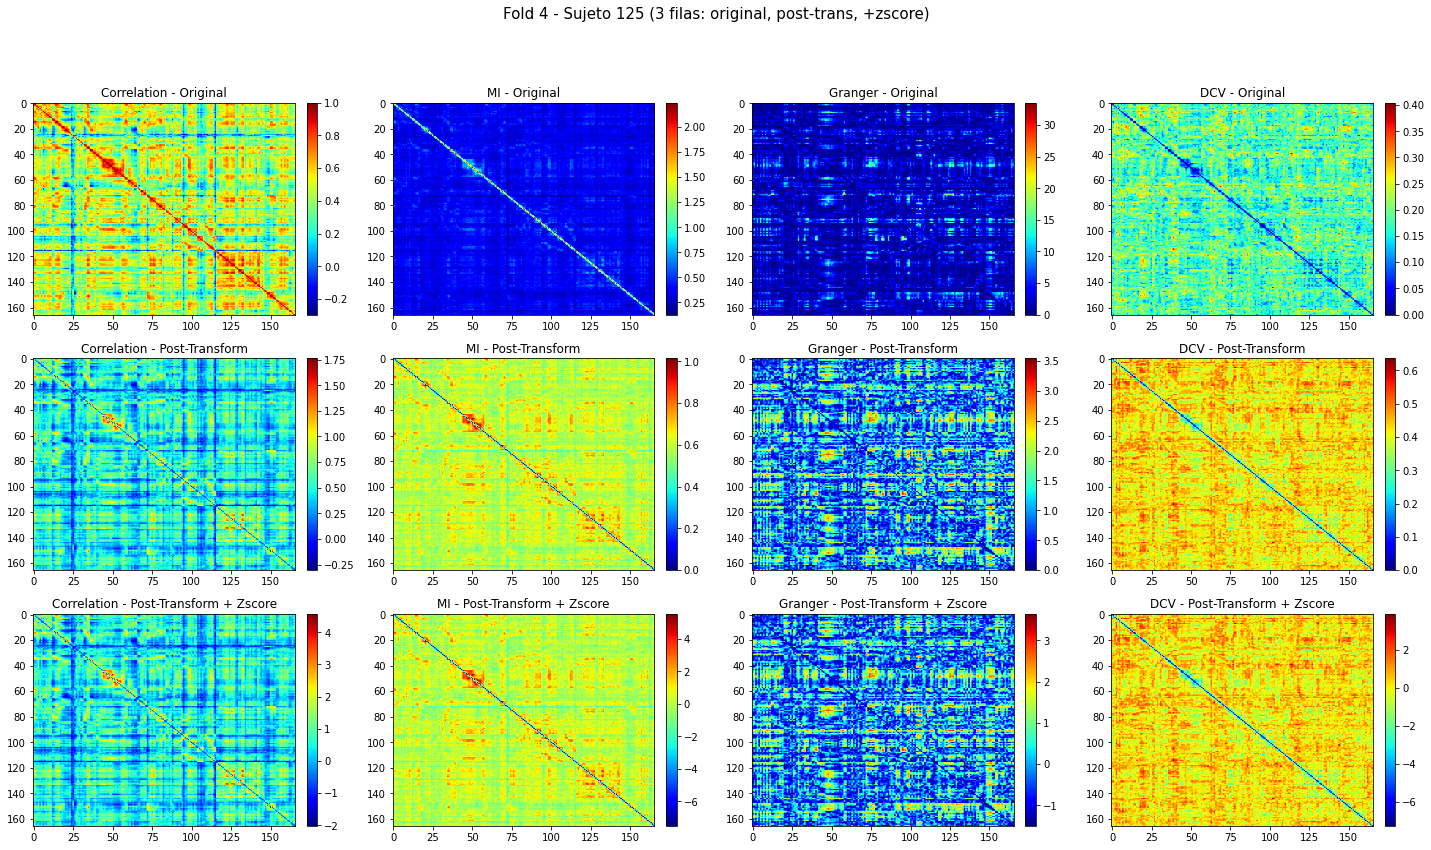

2025-04-28 11:15:26,149 - INFO - [Fold 4] => Datos y estadísticas guardados en /home/diego/Escritorio/GrandMeanNorm/fold_4
2025-04-28 11:15:26,150 - INFO - 
===== FOLD 5 =====
/tmp/ipykernel_694863/3891044452.py:134: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded fi

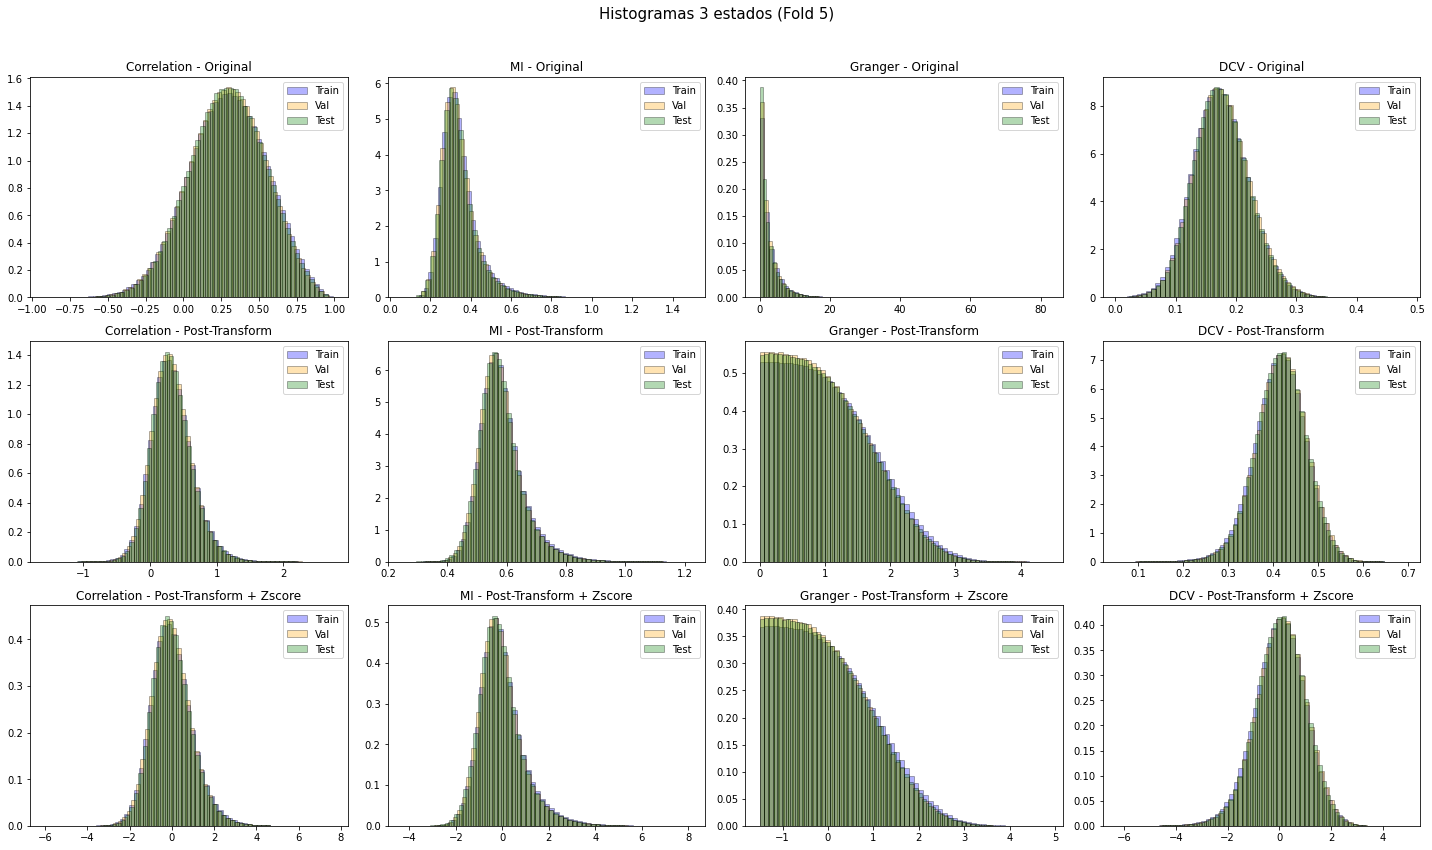

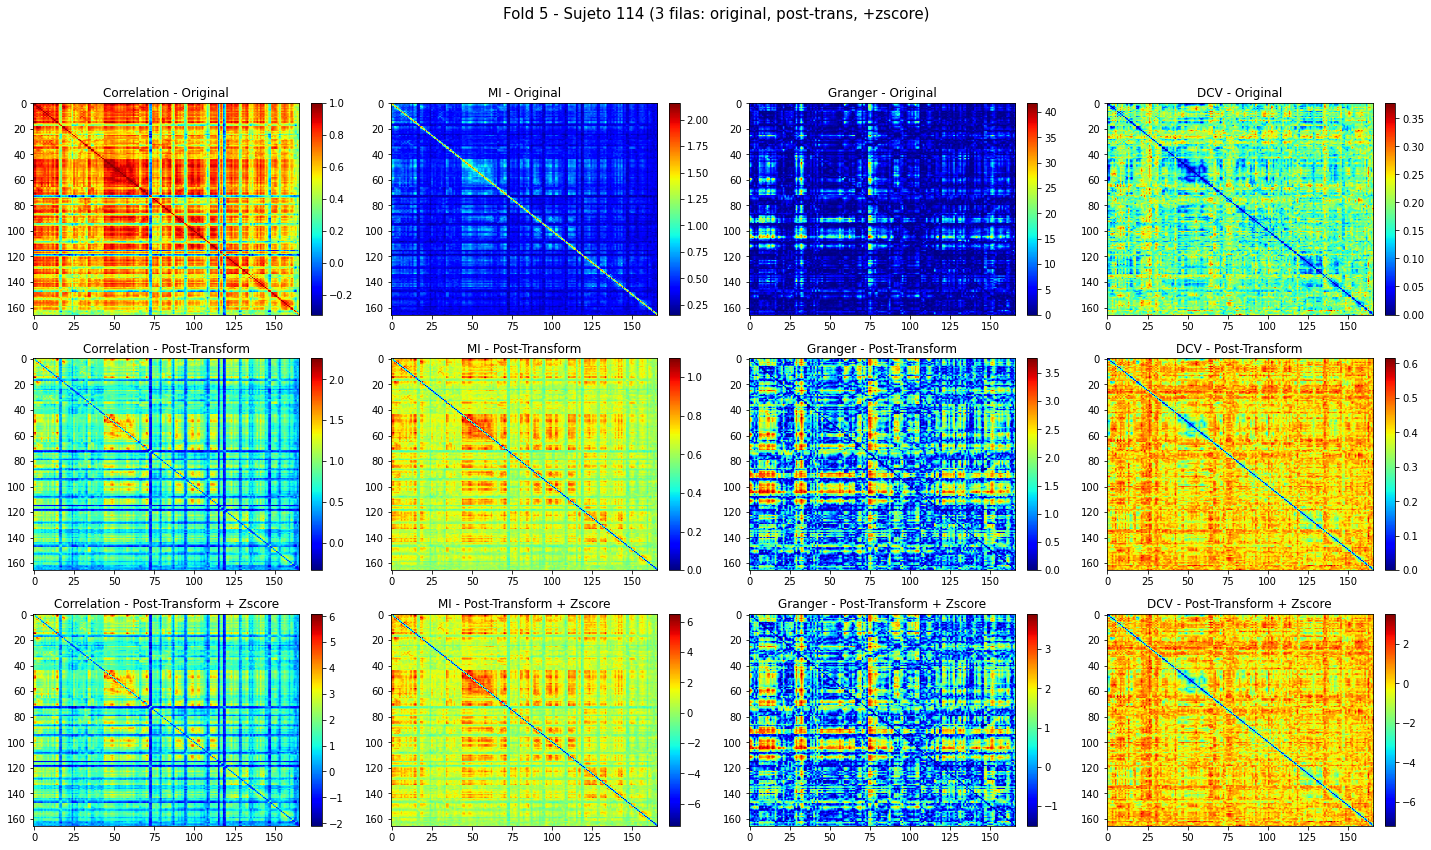

2025-04-28 11:15:50,196 - INFO - [Fold 5] => Datos y estadísticas guardados en /home/diego/Escritorio/GrandMeanNorm/fold_5
2025-04-28 11:15:50,197 - INFO - Proceso de Cross-Validation completo.


In [1]:
import os
import yaml
import torch
import pandas as pd
import numpy as np
import random
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold, train_test_split

###############################################################################
# CONFIGURACIÓN DE LOGGING
###############################################################################
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s"
)

###############################################################################
# CONFIGURACIÓN Y RUTAS
###############################################################################
project_dir = '/home/diego/Escritorio/GrandMeanNorm'
csv_path = os.path.join(project_dir, 'SubjectsDataAndTests.csv')
tensor_data_dir = os.path.join(project_dir, 'TensorData')

config_path = os.path.join(project_dir, 'config.yaml')
with open(config_path, 'r') as f:
    config = yaml.safe_load(f)

seed = config.get('seed', 42)
n_splits = config.get('n_splits', 5)
batch_size = config.get('batch_size', 16)

apply_transforms = config.get('apply_transforms', True)
apply_zscore = config.get('apply_zscore', True)

transforms_config = config.get('transformations', {})
#clamping_config = config.get('clamping', {})

np.random.seed(seed)
torch.manual_seed(seed)
random.seed(seed)

###############################################################################
# LECTURA DE METADATOS
###############################################################################
subjects_df = pd.read_csv(csv_path)

def map_3class_group(x):
    if x == 'AD':
        return 'AD'
    elif x == 'CN':
        return 'CN'
    else:
        return 'Other'

subjects_df['ResearchGroup'] = subjects_df['ResearchGroup'].apply(map_3class_group)
subjects_df['Group_Sex'] = subjects_df['ResearchGroup'].astype(str) + '_' + subjects_df['Sex'].astype(str)

###############################################################################
# AGRUPACIÓN DE RUTAS .PT
###############################################################################
grouped_data = subjects_df.groupby(['ResearchGroup','Sex'])['SubjectID'].apply(list).to_dict()
tensor_groups = {}
for (group, sex), subject_ids in grouped_data.items():
    file_paths = []
    for sid in subject_ids:
        if not os.path.exists(tensor_data_dir):
            logging.warning(f"No existe la carpeta de tensores: {tensor_data_dir}")
            continue
        if group not in ['AD', 'CN']:
            group = 'Other'
        fp = os.path.join(tensor_data_dir, f"{group}_tensor_{sid}.pt")
        file_paths.append(fp)
    tensor_groups[f"{group}_{sex}"] = file_paths

###############################################################################
# FUNCIONES DE PREPROCESO
###############################################################################
def apply_channel_transforms(t: torch.Tensor) -> torch.Tensor:
    """
    Aplica transformaciones específicas a cada canal,
    SIN clamping previo (usa valores originales).
    """
    eps = 1e-8

    if not apply_transforms:
        return t

    if transforms_config.get('fisher_correlation', True):
        fisher = 0.5 * torch.log((1 + t[0]) / (1 - t[0] + eps))
        t[0] = fisher

    if transforms_config.get('sqrt_mi', True):
        mi_sqrt = torch.sqrt(torch.abs(t[1]))
        t[1] = mi_sqrt

    if transforms_config.get('log_granger', True):
        gc_log = torch.log(t[2] + 1.0)
        t[2] = gc_log

    if transforms_config.get('sqrt_dcv', True):
        dcv_sqrt = torch.sqrt(torch.abs(t[3]))
        t[3] = dcv_sqrt

    return t



def zero_diagonals(t: torch.Tensor) -> torch.Tensor:
    """
    Pone en 0 la diagonal de cada canal.
    """
    t_out = t.clone()
    C, H, W = t_out.shape
    idx = torch.arange(H)
    for c in range(C):
        t_out[c, idx, idx] = 0.0
    return t_out

def load_tensor(fp: str):
    """
    Retorna una tupla: (original, post_transform)
    
    - original: tal cual se lee de .pt (sin diagonal en cero, sin fisher/log/sqrt)
    - post_transform: se aplican las transformaciones canal por canal
      (Fisher, sqrt, log, etc.) y LUEGO se pone la diagonal en 0.
    """
    if not os.path.exists(fp):
        logging.warning(f"No existe el archivo: {fp}")
        return None, None
    try:
        data = torch.load(fp)  # shape (4,116,116) u otro
        if isinstance(data, np.ndarray):
            data = torch.tensor(data, dtype=torch.float32)
        if not isinstance(data, torch.Tensor):
            logging.warning(f"Archivo {fp} con formato inesperado: {type(data)}")
            return None, None

        # 1) original
        original = data.clone()

        # 2) apply transforms => luego zero diagonal
        temp = apply_channel_transforms(data.clone())
        post_transform = zero_diagonals(temp)

        return original, post_transform
    except Exception as e:
        logging.error(f"Error al cargar {fp}: {e}")
        return None, None

def load_tensors(paths, batch_size=16):
    """
    Carga las rutas en lotes, retorna (orig_all, post_all), cada uno shape (N,C,H,W).
    """
    orig_list = []
    post_list = []

    for i in range(0, len(paths), batch_size):
        batch_paths = paths[i:i+batch_size]
        for p in batch_paths:
            o, post = load_tensor(p)
            if o is not None:
                orig_list.append(o)
                post_list.append(post)

    if len(orig_list) == 0:
        return None, None

    orig_all = torch.stack(orig_list, dim=0)  # (N,C,H,W)
    post_all = torch.stack(post_list, dim=0) # (N,C,H,W)
    return orig_all, post_all

def compute_mean_std_ignoring_diagonal(dataset: torch.Tensor):
    """
    dataset: (N,C,H,W), ignora diagonal para mean/std
    """
    N, C, H, W = dataset.shape
    mask = torch.ones(H, W, dtype=bool)
    mask[torch.arange(H), torch.arange(W)] = False

    means = torch.zeros(C, dtype=torch.float32)
    stds  = torch.zeros(C, dtype=torch.float32)

    for c in range(C):
        channel_data = dataset[:, c, :, :]
        offdiag = channel_data[:, mask]
        m = offdiag.mean()
        s = offdiag.std()
        if s < 1e-12:
            s = 1e-9
        means[c] = m
        stds[c]  = s
    return means, stds

def zscore_ignoring_diagonal(dataset: torch.Tensor, mean_c: torch.Tensor, std_c: torch.Tensor):
    """
    dataset: (N,C,H,W) => normaliza canal por canal, diagonal ya está en 0
    """
    out = dataset.clone()
    eps = 1e-9
    for c in range(dataset.shape[1]):
        out[:, c] = (out[:, c] - mean_c[c]) / (std_c[c] + eps)
    return out

###############################################################################
# HISTOGRAMAS Y PLOTEO 3 FILAS
###############################################################################
def flatten_off_diagonal(data: torch.Tensor, c: int) -> np.ndarray:
    """
    Extrae off-diag del canal c en TODOS los sujetos.
    data: (N,C,H,W)
    """
    N, C_, H, W = data.shape
    assert c < C_, "Canal fuera de rango"
    mask = np.ones((H, W), dtype=bool)
    np.fill_diagonal(mask, False)
    channel_slice = data[:, c, :, :]
    off_diag_vals = channel_slice[:, mask]
    return off_diag_vals.flatten().cpu().numpy()

def plot_histograms_3rows(
    data_train_orig, data_val_orig, data_test_orig,
    data_train_post, data_val_post, data_test_post,
    data_train_z,    data_val_z,    data_test_z,
    fold_idx
):
    """
    3 filas x 4 columnas:
      Fila 0 => original
      Fila 1 => post-transform
      Fila 2 => post-transform + zscore

    Cada fila muestra 3 histogramas (train/val/test) de off-diagonal.
    """
    channel_names = ["Correlation", "MI", "Granger", "DCV"]
    C = data_train_orig.shape[1]
    
    fig, axes = plt.subplots(nrows=3, ncols=C, figsize=(5*C, 12))
    fig.suptitle(f"Histogramas 3 estados (Fold {fold_idx})", fontsize=15)
    
    def plot_hist(ax, values, color, label, bins=60, alpha=0.3):
        ax.hist(values, bins=bins, alpha=alpha, color=color, label=label,
                density=True, edgecolor='black')
    
    row_titles = ["Original", "Post-Transform", "Post-Transform + Zscore"]
    
    for c in range(C):
        # --------------------------------------------------------------------
        # Fila 0 => original
        ax0 = axes[0, c]
        tr_o = flatten_off_diagonal(data_train_orig, c)
        vl_o = flatten_off_diagonal(data_val_orig,   c)
        ts_o = flatten_off_diagonal(data_test_orig,  c)
        plot_hist(ax0, tr_o, 'blue',   'Train')
        plot_hist(ax0, vl_o, 'orange', 'Val')
        plot_hist(ax0, ts_o, 'green',  'Test')
        ax0.set_title(f"{channel_names[c]} - {row_titles[0]}")
        ax0.legend()
        
        # --------------------------------------------------------------------
        # Fila 1 => post-transform
        ax1 = axes[1, c]
        tr_pt = flatten_off_diagonal(data_train_post, c)
        vl_pt = flatten_off_diagonal(data_val_post,   c)
        ts_pt = flatten_off_diagonal(data_test_post,  c)
        plot_hist(ax1, tr_pt, 'blue',   'Train')
        plot_hist(ax1, vl_pt, 'orange', 'Val')
        plot_hist(ax1, ts_pt, 'green',  'Test')
        ax1.set_title(f"{channel_names[c]} - {row_titles[1]}")
        ax1.legend()
        
        # --------------------------------------------------------------------
        # Fila 2 => post-transform + zscore
        ax2 = axes[2, c]
        tr_z = flatten_off_diagonal(data_train_z, c)
        vl_z = flatten_off_diagonal(data_val_z,   c)
        ts_z = flatten_off_diagonal(data_test_z,  c)
        plot_hist(ax2, tr_z, 'blue',   'Train')
        plot_hist(ax2, vl_z, 'orange', 'Val')
        plot_hist(ax2, ts_z, 'green',  'Test')
        ax2.set_title(f"{channel_names[c]} - {row_titles[2]}")
        ax2.legend()
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


def plot_4matrices_3rows(
    m_orig: torch.Tensor,       # shape (C,H,W)
    m_post: torch.Tensor,       # shape (C,H,W)
    m_post_z: torch.Tensor,     # shape (C,H,W)
    fold_idx: int,
    subject_idx: int
):
    """
    3 filas x 4 columnas:
      - Fila 0 => original
      - Fila 1 => post-transform
      - Fila 2 => post-transform + z-score

    Columnas => cada canal.
    """
    titles = ["Correlation", "MI", "Granger", "DCV"]
    
    fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 12))
    fig.suptitle(f"Fold {fold_idx} - Sujeto {subject_idx} (3 filas: original, post-trans, +zscore)", fontsize=15)

    row_titles = ["Original", "Post-Transform", "Post-Transform + Zscore"]
    data_list = [m_orig, m_post, m_post_z]
    
    for row_idx in range(3):
        mat = data_list[row_idx]
        for c in range(4):
            ax = axes[row_idx, c]
            im = ax.imshow(mat[c].cpu().numpy(), aspect='auto', cmap='jet')
            ax.set_title(f"{titles[c]} - {row_titles[row_idx]}")
            plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    
    plt.tight_layout(rect=[0,0,1,0.93])
    plt.show()

###############################################################################
# CROSS-VALIDATION
###############################################################################
X, y = [], []
for gsex, file_paths in tensor_groups.items():
    for fp in file_paths:
        X.append(fp)
        y.append(gsex)

X = np.array(X)
y = np.array(y)

logging.info(f"Total de sujetos en CSV: {len(subjects_df)}")
logging.info(f"Total de rutas generadas en X: {len(X)}")
logging.info(f"Distribución de y: {np.unique(y, return_counts=True)}")

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
fold_number = 1

for train_val_idx, test_idx in skf.split(X, y):
    logging.info(f"\n===== FOLD {fold_number} =====")
    X_train_val, X_test = X[train_val_idx], X[test_idx]
    y_train_val, y_test = y[train_val_idx], y[test_idx]

    # Separar train vs val (80/20 estratificado)
    tv_idx = np.arange(len(X_train_val))
    train_idx, val_idx = train_test_split(tv_idx, test_size=0.2,
                                          stratify=y_train_val,
                                          random_state=seed)
    X_train, X_val = X_train_val[train_idx], X_train_val[val_idx]
    y_train, y_val = y_train_val[train_idx], y_train_val[val_idx]

    # 1) Cargar => (orig, post)
    (train_orig, train_post) = load_tensors(X_train)
    (val_orig,   val_post)   = load_tensors(X_val)
    (test_orig,  test_post)  = load_tensors(X_test)

    # Verificar sets vacíos
    if train_orig is None or val_orig is None or test_orig is None:
        logging.warning(f"Faltan datos en fold {fold_number}. Omitiendo...")
        fold_number += 1
        continue

    n_train = train_orig.shape[0]
    n_val   = val_orig.shape[0]
    n_test  = test_orig.shape[0]
    logging.info(f"FOLD {fold_number} => Train: {n_train}, Val: {n_val}, Test: {n_test}")

    # 2) z-score => se calcula la media/std en train_post
    mean_c, std_c = compute_mean_std_ignoring_diagonal(train_post)

    if apply_zscore:
        train_z = zscore_ignoring_diagonal(train_post, mean_c, std_c)
        val_z   = zscore_ignoring_diagonal(val_post,   mean_c, std_c)
        test_z  = zscore_ignoring_diagonal(test_post,  mean_c, std_c)
    else:
        train_z = train_post.clone()
        val_z   = val_post.clone()
        test_z  = test_post.clone()


    # 3) Graficar histogramas con 3 filas (original, post, post+zscore)
    plot_histograms_3rows(
        data_train_orig=train_orig,  data_val_orig=val_orig,   data_test_orig=test_orig,
        data_train_post=train_post,  data_val_post=val_post,   data_test_post=test_post,
        data_train_z=train_z,        data_val_z=val_z,         data_test_z=test_z,
        fold_idx=fold_number
    )

    # 4) Elegir 1 sujeto random del train y mostrar sus 4 canales en 3 filas
    random_idx = random.randint(0, n_train - 1)
    m_orig = train_orig[random_idx]   # shape (C,H,W)
    m_post = train_post[random_idx]
    m_z    = train_z[random_idx]
    plot_4matrices_3rows(
        m_orig=m_orig,
        m_post=m_post,
        m_post_z=m_z,
        fold_idx=fold_number,
        subject_idx=random_idx
    )

    # 5) Guardar resultados en disco
    fold_dir = os.path.join(project_dir, f"fold_{fold_number}")
    os.makedirs(fold_dir, exist_ok=True)

    torch.save(train_orig, os.path.join(fold_dir, 'train_original.pt'))
    torch.save(train_post, os.path.join(fold_dir, 'train_post.pt'))
    torch.save(train_z,    os.path.join(fold_dir, 'train_z.pt'))

    torch.save(val_orig, os.path.join(fold_dir, 'val_original.pt'))
    torch.save(val_post, os.path.join(fold_dir, 'val_post.pt'))
    torch.save(val_z,    os.path.join(fold_dir, 'val_z.pt'))

    torch.save(test_orig, os.path.join(fold_dir, 'test_original.pt'))
    torch.save(test_post, os.path.join(fold_dir, 'test_post.pt'))
    torch.save(test_z,    os.path.join(fold_dir, 'test_z.pt'))

    torch.save(y_train, os.path.join(fold_dir, 'train_labels.pt'))
    torch.save(y_val,   os.path.join(fold_dir, 'val_labels.pt'))
    torch.save(y_test,  os.path.join(fold_dir, 'test_labels.pt'))

    import json
    fold_stats = {
        'means': mean_c.tolist(),
        'stds':  std_c.tolist()
    }
    with open(os.path.join(fold_dir, 'train_stats.json'), 'w') as fjs:
        json.dump(fold_stats, fjs, indent=2)

    logging.info(f"[Fold {fold_number}] => Datos y estadísticas guardados en {fold_dir}")
    fold_number += 1

logging.info("Proceso de Cross-Validation completo.")





In [6]:
import os

count_found = 0
count_missing = 0

for (group, sex), subject_ids in grouped_data.items():
    for sid in subject_ids:
        original_group = group
        # Si quieres unificar MCI, EMCI, LMCI como Other:
        if group not in ['AD', 'CN']:
            group = 'Other'

        expected_path = os.path.join(tensor_data_dir, f"{group}_tensor_{sid}.pt")
        if os.path.exists(expected_path):
            count_found += 1
        else:
            count_missing += 1

total = count_found + count_missing
print(f"Encontrados: {count_found}")
print(f"Faltan:      {count_missing}")
print(f"Total:       {total}")



Encontrados: 432
Faltan:      0
Total:       432


In [5]:
missing_ids = []

for (group, sex), subject_ids in grouped_data.items():
    for sid in subject_ids:
        original_group = group
        if group not in ['AD', 'CN']:
            group = 'Other'
        expected_path = os.path.join(tensor_data_dir, f"{group}_tensor_{sid}.pt")

        if os.path.exists(expected_path):
            count_found += 1
        else:
            count_missing += 1
            missing_ids.append(f"{original_group}_tensor_{sid}.pt")

# Después del bucle
print(f"Encontrados: {count_found}")
print(f"Faltan:      {count_missing}")
print("IDs faltantes:")
for mid in missing_ids:
    print(" -", mid)


Encontrados: 864
Faltan:      0
IDs faltantes:
